## Loan Prediction

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [89]:
# Load both dataset
traindata = pd.read_csv('train_data.csv')
testdata = pd.read_csv('test_data.csv')

In [90]:
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [92]:
print(traindata.info())
print(testdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

In [93]:
print(traindata.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [94]:
print(testdata.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


#### Handle Missing Values

In [95]:
# Fill categorical columns with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    traindata[col].fillna(traindata[col].mode()[0], inplace=True)
    testdata[col].fillna(testdata[col].mode()[0], inplace=True)

# Fill numerical columns
traindata['LoanAmount'].fillna(traindata['LoanAmount'].median(), inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].median(), inplace=True)

traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].median(), inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].median(), inplace=True)

traindata['Credit_History'].fillna(traindata['Credit_History'].median(), inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].median(), inplace=True)

In [96]:
print(traindata.isnull().sum(), testdata.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [97]:
print(traindata.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


#### Data Visualization

C:\Users\Jarshana Shrestha\AppData\Local\Temp\ipykernel_27188\267167247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=traindata, x='Loan_Status', palette={'Y': 'green', 'N': 'red'})


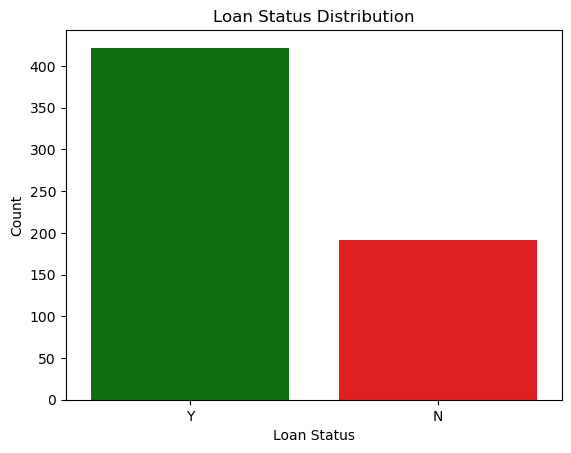

In [98]:
# Visualize Loan status
sns.countplot(data=traindata, x='Loan_Status', palette={'Y': 'green', 'N': 'red'})
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

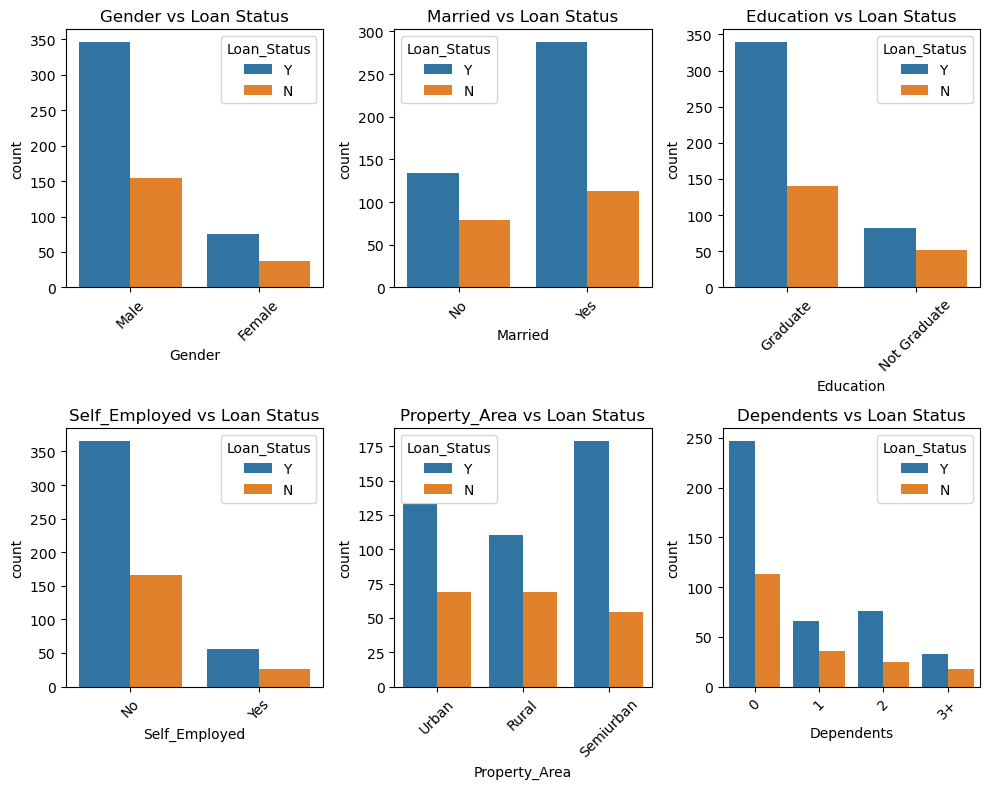

In [99]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

plt.figure(figsize=(10, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=traindata, x=col, hue='Loan_Status')
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

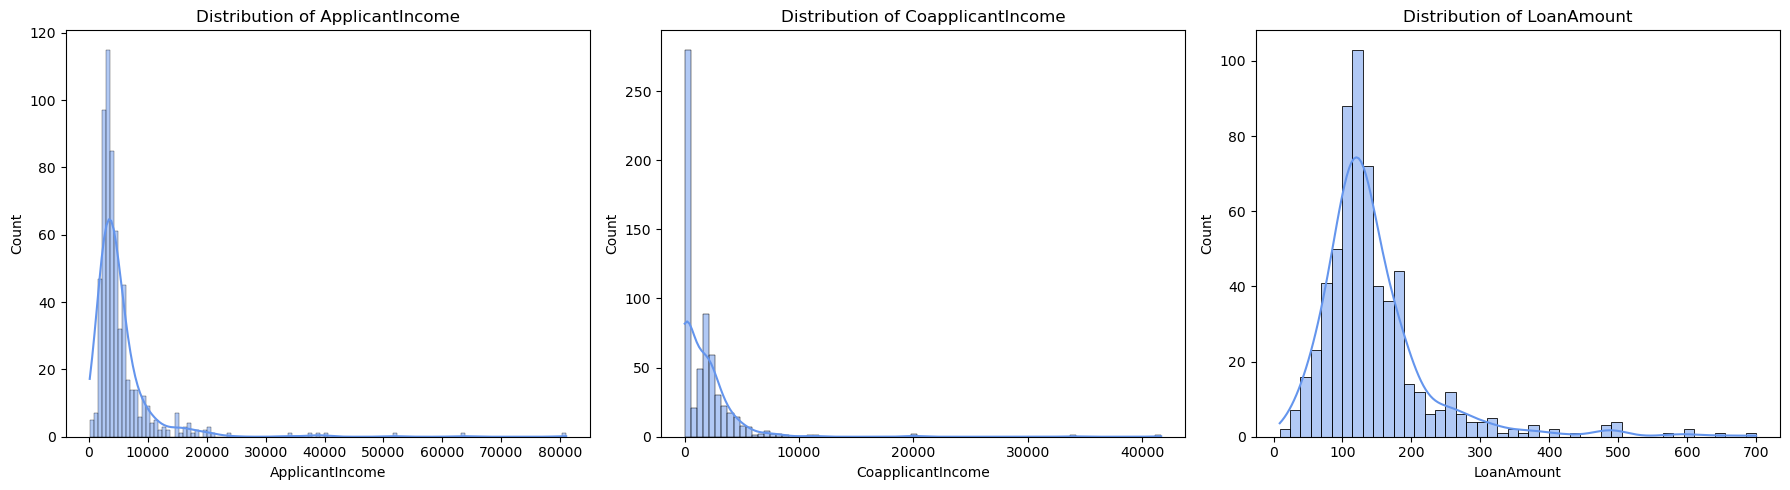

In [100]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(18, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(traindata[col], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

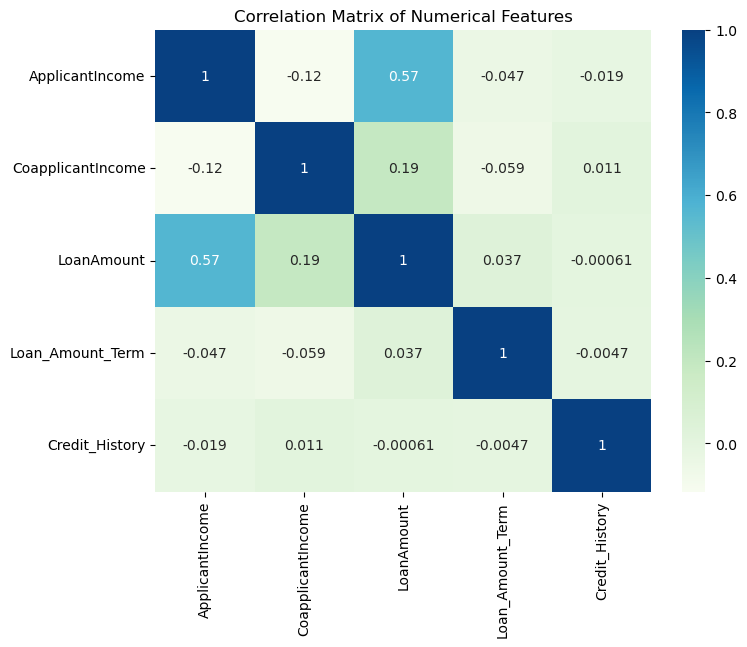

In [101]:
# numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Subset the numerical data
num_data = traindata[num_cols]

# Compute correlation matrix
correlation_matrix = num_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap ='GnBu')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Feature Engineering

In [102]:
# Fix '3+' in Dependents and convert to integer
traindata['Dependents'] = traindata['Dependents'].replace('3+', 3).astype(int)
testdata['Dependents'] = testdata['Dependents'].replace('3+', 3).astype(int)

In [103]:
# Total Income
traindata['Total_Income'] = traindata['ApplicantIncome'] + traindata['CoapplicantIncome']
testdata['Total_Income'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']

In [105]:
# Encode categorical variables
encode_cols = ['Gender', 'Married', 'Dependents', 'Education',
               'Self_Employed', 'Property_Area']

le = LabelEncoder()
for col in encode_cols:
    traindata[col] = le.fit_transform(traindata[col])
    testdata[col] = le.transform(testdata[col])

# Encode target variable
traindata['Loan_Status'] = le.fit_transform(traindata['Loan_Status'])

In [115]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection: Stat Test + Feature Importance
X = traindata.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = traindata['Loan_Status']

# Stat test
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})

print(scores.sort_values(by='Score', ascending=False))

              Feature       Score
9      Credit_History  252.652090
1             Married    5.164552
3           Education    4.547685
6   CoapplicantIncome    2.151457
7          LoanAmount    0.675896
10      Property_Area    0.631733
11       Total_Income    0.599037
8    Loan_Amount_Term    0.311334
0              Gender    0.198059
2          Dependents    0.062665
5     ApplicantIncome    0.013574
4       Self_Employed    0.008380


In [117]:
from sklearn.decomposition import PCA

# Dimensionality Reduction (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance by PCA:", pca.explained_variance_ratio_)

Explained Variance by PCA: [0.2180807  0.13117217 0.09549719 0.08928836 0.08604956 0.08235011
 0.07710449 0.06735855]


In [106]:
x = traindata.drop(columns=['Loan_ID', 'Loan_Status', 'LoanAmount'])
y = traindata['Loan_Status']

### Model Enhancement & Tuning

After preparing the data, I moved on to model training. I chose a Logistic Regression model for its simplicity and effectiveness in binary classification problems. The model was trained on the processed data, and we evaluated its performance using accuracy, a confusion matrix, and a classification report.

In [119]:
# Split training data into features and target

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

#Model training
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

# Validation
y_pred = logreg.predict(x_val)

#Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [121]:
# Cross-Validation

cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy: ", cv_scores.mean())

Cross-validation Accuracy:  0.7588431294149006


In [131]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for LogisticRegression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solver options
}

grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(x, y)

print("\nBest LogisticRegression Params:", grid_logreg.best_params_)
print("Best CV Score:", grid_logreg.best_score_)


Best LogisticRegression Params: {'C': 0.1, 'solver': 'liblinear'}
Best CV Score: 0.8078368652538984


I performed cross-validation to assess the model’s robustness and applied hyperparameter tuning using grid search to find the best parameters. The best results were achieved with the parameters C=0.1 and solver='liblinear'.

To further improve the model's performance, I experimented with other algorithms like Gradient Boosting and Neural Networks. 

In [123]:
### Alternative Models

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print("\nGradientBoosting Accuracy:", accuracy_score(y_val, gb.predict(x_val)))


GradientBoosting Accuracy: 0.7723577235772358


In [125]:
from sklearn.neural_network import MLPClassifier

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
mlp.fit(x_train, y_train)
print("Neural Network Accuracy:", accuracy_score(y_val, mlp.predict(x_val)))

Neural Network Accuracy: 0.6504065040650406


### Model Evaluation & Deployment Readiness

Logistic Regression performed the best in terms of accuracy and other evaluation metrics, so I decided to move forward with it as the final model. To streamline the training process, I set up a machine learning pipeline that combines feature scaling with StandardScaler and the Logistic Regression model.

Once the pipeline was ready, I trained it using the full training dataset and generated predictions on the test data. I stored these predictions in a DataFrame along with the corresponding Loan_ID values to keep track of each individual loan. Then, I saved the results to a CSV file (final_submission_jarshana.csv) with the predicted loan status converted to 'Y' for approved and 'N' for not approved.

In [132]:
test_x = testdata.drop(columns=['Loan_ID', 'LoanAmount'])

# Based on evaluation metrics, we’ll choose the best model (Logistic Regression in this case)
final_model = LogisticRegression(C=0.1, solver='liblinear')

In [140]:
from sklearn.pipeline import Pipeline

final_model = LogisticRegression(C=0.1, solver='liblinear')

# Create Pipeline
# First, we scale the features, then apply Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('model', final_model)         # Logistic Regression Model
])

# Train the pipeline on the full training data
pipeline.fit(x, y)

# Model Evaluation on Test Data
test_x = testdata.drop(columns=['Loan_ID', 'LoanAmount'])
test_preds = pipeline.predict(test_x)

# Save Predictions as CSV
final_submission = pd.DataFrame({
    'Loan_ID': testdata['Loan_ID'],  # Keep the Loan_ID for submission
    'Loan_Status': ['Y' if pred == 1 else 'N' for pred in test_preds]  # Convert numeric prediction to Y/N
})

# Save the final predictions to a CSV file
final_submission.to_csv('final_submission_jarshana.csv', index=False)

print("\n✅ Predictions saved as 'final_submission_jarshana.csv'")


✅ Predictions saved as 'final_submission_jarshana.csv'
